In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel("diabetes_prediction_imbalance_data.xlsx")

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,91,113,11,27,33.184646,2.238743,61,0
1,3,113,91,10,50,20.030556,1.366483,36,0
2,7,112,91,21,187,25.357976,2.483116,24,0
3,4,127,83,14,34,36.664819,0.277112,48,0
4,6,198,100,46,156,19.000347,1.429250,23,0
...,...,...,...,...,...,...,...,...,...
95,9,185,85,18,58,23.307311,2.269981,37,1
96,8,123,107,48,26,39.209285,0.935813,57,1
97,6,103,116,38,109,18.761321,1.333575,54,1
98,8,158,111,35,267,39.352395,1.980767,34,1


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,4.910000,140.610000,90.920000,32.070000,143.590000,29.586034,1.455380,43.450000,0.200000
std,2.871296,35.182897,18.672445,11.523586,73.942251,6.805692,0.697391,14.898563,0.402015
min,0.000000,80.000000,60.000000,10.000000,15.000000,18.733010,0.134907,20.000000,0.000000
25%,2.000000,110.500000,76.000000,25.000000,78.500000,24.246736,0.956704,31.750000,0.000000
50%,5.000000,141.000000,91.000000,34.000000,139.500000,29.838898,1.501565,42.500000,0.000000
75%,7.000000,173.500000,108.000000,42.000000,199.250000,35.582922,2.083564,55.500000,0.000000
max,9.000000,198.000000,119.000000,49.000000,272.000000,39.795861,2.499322,69.000000,1.000000


 #### To check whether your dataset is balanced or not, you need to examine the distribution of the target classes (in your case, "Positive" and 

#### "Negative" outcomes for diabetes). Here's how you can check the balance of your dataset in Python

In [5]:
data["Outcome"]

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: Outcome, Length: 100, dtype: int64

In [6]:
class_distribution=data["Outcome"].value_counts()
print(class_distribution)

Outcome
0    80
1    20
Name: count, dtype: int64


In [7]:
data["Outcome"]

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: Outcome, Length: 100, dtype: int64

Text(0.5, 1.0, 'Class Distribution of Diabetes Outcome')

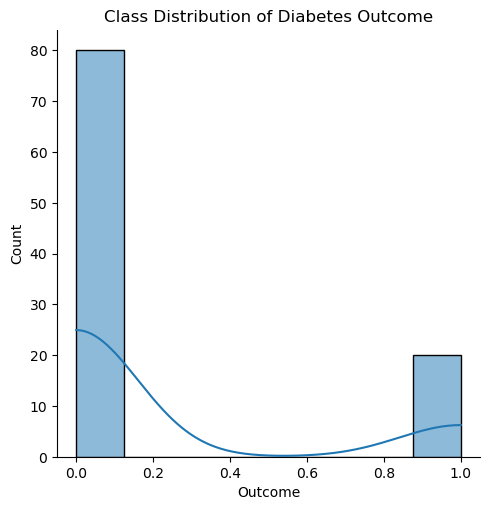

In [8]:
sns.displot(data["Outcome"],kde=True)
plt.title('Class Distribution of Diabetes Outcome')

Text(0.5, 1.0, 'Class Distribution of Diabetes Outcome')

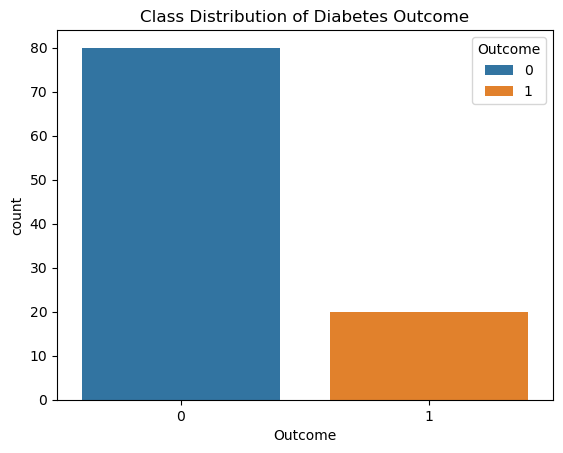

In [9]:
sns.countplot(data=data,x=data["Outcome"],hue='Outcome')
plt.title('Class Distribution of Diabetes Outcome')

In [10]:
class_counts = data['Outcome'].value_counts()
imbalance_ratio = class_counts[0] / class_counts[1]  # Majority class / Minority class
print(f'Imbalance Ratio: {imbalance_ratio:.2f}')

Imbalance Ratio: 4.00


____________

## How to Balance Imbalance Dataset ?

#### Let's See.....

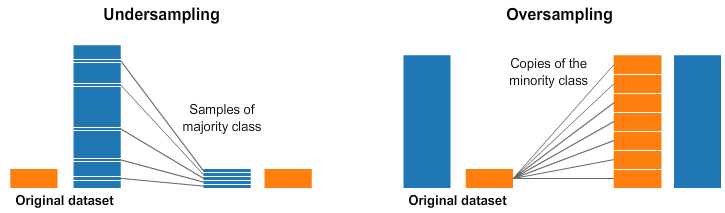

# Random Over-Sampling (for minority class)

**This technique increases the number of samples in the minority class by duplicating the samples or by understanding data patterns.**
- **Pros:** It prevents the loss of information and balances the data.
- **Cons:** It can lead to overfitting because the same instances are repeated.

- Random over-sampling is a technique used to balance an imbalanced dataset by increasing the number of instances in the minority class.
-  This is done by randomly duplicating examples from the minority class until the classes are balanced.

In [11]:
# Separate features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [12]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,91,113,11,27,33.184646,2.238743,61
1,3,113,91,10,50,20.030556,1.366483,36
2,7,112,91,21,187,25.357976,2.483116,24
3,4,127,83,14,34,36.664819,0.277112,48
4,6,198,100,46,156,19.000347,1.429250,23
...,...,...,...,...,...,...,...,...
95,9,185,85,18,58,23.307311,2.269981,37
96,8,123,107,48,26,39.209285,0.935813,57
97,6,103,116,38,109,18.761321,1.333575,54
98,8,158,111,35,267,39.352395,1.980767,34


In [13]:
y

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: Outcome, Length: 100, dtype: int64

### SMOTE (Synthetic Minority Over-sampling Technique)


**SMOTE generates synthetic samples for the minority class using a K-nearest neighbors algorithm.**
- **Pros:** It creates new synthetic data points and can help the model generalize better.
- **Cons:** It can increase the chance of overfitting when the minority class is too small or the data is noisy.

In [14]:
from imblearn.over_sampling import SMOTE

In [15]:
smote=SMOTE(sampling_strategy="auto",random_state=42)

In [16]:
x_smote,y_smote=smote.fit_resample(X,y)

In [17]:
x_smote

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,91,113,11,27,33.184646,2.238743,61
1,3,113,91,10,50,20.030556,1.366483,36
2,7,112,91,21,187,25.357976,2.483116,24
3,4,127,83,14,34,36.664819,0.277112,48
4,6,198,100,46,156,19.000347,1.429250,23
...,...,...,...,...,...,...,...,...
155,6,132,66,39,24,24.111756,1.784700,40
156,6,97,107,38,125,19.004381,1.481776,51
157,1,90,100,11,192,30.637461,0.201820,41
158,7,142,107,34,268,38.957225,1.826112,36


In [18]:
y_smote

0      0
1      0
2      0
3      0
4      0
      ..
155    1
156    1
157    1
158    1
159    1
Name: Outcome, Length: 160, dtype: int64

In [19]:
y_smote.value_counts()

Outcome
0    80
1    80
Name: count, dtype: int64

In [20]:
# Combine the new balanced data
balance_data=pd.concat([x_smote,y_smote],axis=1)

In [21]:
balance_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,91,113,11,27,33.184646,2.238743,61,0
1,3,113,91,10,50,20.030556,1.366483,36,0
2,7,112,91,21,187,25.357976,2.483116,24,0
3,4,127,83,14,34,36.664819,0.277112,48,0
4,6,198,100,46,156,19.000347,1.429250,23,0
...,...,...,...,...,...,...,...,...,...
155,6,132,66,39,24,24.111756,1.784700,40,1
156,6,97,107,38,125,19.004381,1.481776,51,1
157,1,90,100,11,192,30.637461,0.201820,41,1
158,7,142,107,34,268,38.957225,1.826112,36,1


_____________

_____________


## Random Under-Sampling (for majority class)


**This method reduces the number of majority class samples to balance it with the minority class.**    

- **Pros:** It makes the dataset smaller and faster to train.           
 - **Cons:** Risk of losing valuable information from the majority class.         

- Random Under-Sampling is a technique used to handle imbalanced datasets by reducing the number of instances from the majority class. 
- This helps balance the dataset by keeping all instances from the minority class while randomly selecting a subset of the majority class.

In [22]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,91,113,11,27,33.184646,2.238743,61,0
1,3,113,91,10,50,20.030556,1.366483,36,0
2,7,112,91,21,187,25.357976,2.483116,24,0
3,4,127,83,14,34,36.664819,0.277112,48,0
4,6,198,100,46,156,19.000347,1.429250,23,0
...,...,...,...,...,...,...,...,...,...
95,9,185,85,18,58,23.307311,2.269981,37,1
96,8,123,107,48,26,39.209285,0.935813,57,1
97,6,103,116,38,109,18.761321,1.333575,54,1
98,8,158,111,35,267,39.352395,1.980767,34,1


In [23]:
data.shape

(100, 9)

In [24]:
data["Outcome"].value_counts()

Outcome
0    80
1    20
Name: count, dtype: int64

In [25]:
# Separate features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [26]:
from imblearn.under_sampling import RandomUnderSampler

In [27]:
randomundersampler=RandomUnderSampler(random_state=42)

In [28]:
x_resample,y_resample=randomundersampler.fit_resample(X,y)

In [29]:
x_resample

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
30,8,94,78,25,172,36.268836,2.053108,44
0,6,91,113,11,27,33.184646,2.238743,61
22,9,84,61,34,122,38.511283,0.948045,35
31,2,169,61,45,161,25.381066,1.743355,22
18,5,126,76,47,68,27.371280,1.588318,67
28,6,88,92,11,138,37.904887,1.386631,59
10,3,123,71,12,200,37.365648,1.606139,43
70,7,109,78,38,37,26.468806,1.712082,20
4,6,198,100,46,156,19.000347,1.429250,23
12,7,165,61,33,204,35.774840,2.262779,53


In [30]:
y_resample

30    0
0     0
22    0
31    0
18    0
28    0
10    0
70    0
4     0
12    0
49    0
33    0
67    0
35    0
68    0
45    0
73    0
61    0
55    0
40    0
80    1
81    1
82    1
83    1
84    1
85    1
86    1
87    1
88    1
89    1
90    1
91    1
92    1
93    1
94    1
95    1
96    1
97    1
98    1
99    1
Name: Outcome, dtype: int64

In [37]:
balance_data2=pd.concat([x_resample,y_resample],axis=1)

In [40]:
balance_data2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
30,8,94,78,25,172,36.268836,2.053108,44,0
0,6,91,113,11,27,33.184646,2.238743,61,0
22,9,84,61,34,122,38.511283,0.948045,35,0
31,2,169,61,45,161,25.381066,1.743355,22,0
18,5,126,76,47,68,27.371280,1.588318,67,0
28,6,88,92,11,138,37.904887,1.386631,59,0
10,3,123,71,12,200,37.365648,1.606139,43,0
70,7,109,78,38,37,26.468806,1.712082,20,0
4,6,198,100,46,156,19.000347,1.429250,23,0
12,7,165,61,33,204,35.774840,2.262779,53,0


- ####  NOTE : The choice between **Random Over-Sampling** and **Random Under-Sampling** depends on the specific characteristics of your dataset and the goals of your machine learning project.

## Which One to Use?

### 1. When to Use Random Over-Sampling ?:

- When you have a small dataset and want to retain all the information from the minority class.
- When your model is prone to underfitting or needs more examples to learn effectively.



### 2. When to Use Random Under-Sampling ?:

-When you have a large dataset, and reducing its size won’t significantly affect the model's performance.
-When you want to reduce training time and have a strong understanding of the data.


### Conclusion :-


Ultimately, the choice between **random over-sampling** and **random under-sampling** should be informed by the characteristics of your specific dataset, the model you are using, and your specific goals. It's often beneficial to try both methods and evaluate their performance using cross-validation to determine which approach yields the best results for your particular case.

______________________________________________________________

## ***Thank You...!!!***

______________________________________________________________